In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np
import importlib
from os.path import expanduser, join, basename
from os import walk

import task
importlib.reload(task)
from task import generate_trials

import train
importlib.reload(train)
from train import get_default_hp

from network import Model

import my_rnn_functions as mrnn
importlib.reload(mrnn)

<module 'my_rnn_functions' from '/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/my_rnn_functions.py'>

In [140]:
home = expanduser('~')
saving_path = join(home,'My_scripts_Local/Models_Local/ThalRNN/saved_models/')
model_name = 'smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6'
model_dir=join(saving_path,model_name)


In [141]:
importlib.reload(mrnn)
model_data = mrnn.get_model_data(model_dir)


Network based on full_EI_CC_TC_with_TRN_v1 weight mask.



/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>
Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
Model hp restored.

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt


In [142]:
importlib.reload(mrnn)

<module 'my_rnn_functions' from '/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/my_rnn_functions.py'>

10.0% of weights trained.


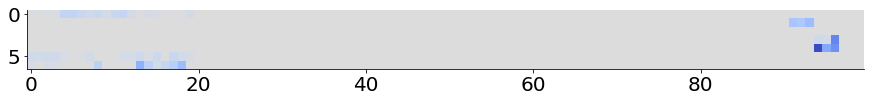

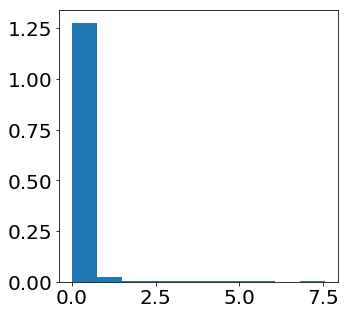

In [143]:
w_type = 'input'
mrnn.plot_weight_matrix(model_data, w_type, abs_weights=False, hist=True)


28.999999999999996% of weights trained.


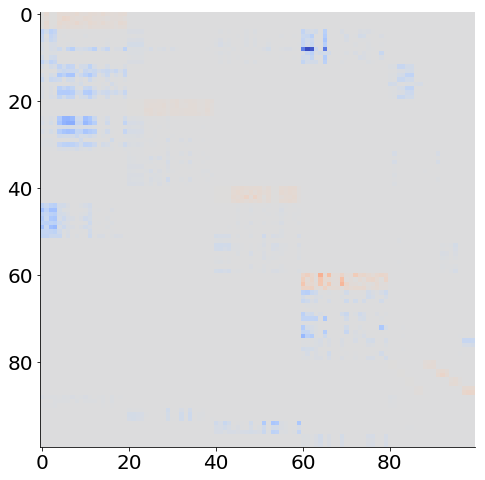

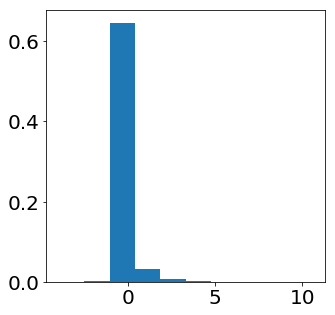

In [144]:
w_type = 'hidden'
mrnn.plot_weight_matrix(model_data, w_type, abs_weights=False, hist=True)


8.0% of weights trained.


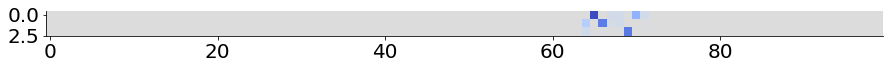

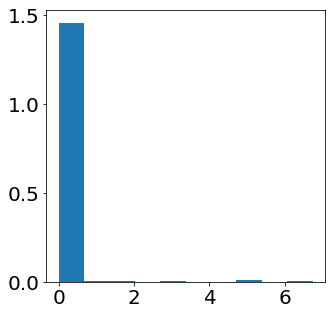

In [145]:
w_type = 'output'
mrnn.plot_weight_matrix(model_data, w_type, abs_weights=False, hist=True)


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0


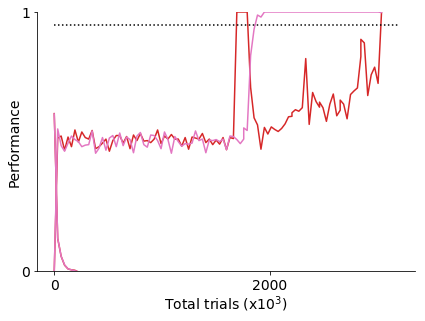

<Figure size 1080x432 with 0 Axes>

In [137]:
importlib.reload(mrnn)

#trained_models = [basename(x[0]) for x in walk(saving_path) if '_seed_' in x[0]]
#trained_models = ['full_EI_CC_TC_with_TRN_rnn_200_contextdelaydm_MD_task_retanh_seed_' + str(i) for i in range(3,4)] # if i != 3 and i != 5]
trained_models = ['smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0']

rules = ['contextdelaydm_MD_task_mod1', 'contextdelaydm_MD_task_mod2'] # ['contextdelaydm1', 'multidelaydm', 'contextdelaydm2'] ['contextdm1', 'multidelaydm', 'contextdm2'] #model_data['hp']['rules']

mrnn.plt_various_performances(trained_models,models_saving_dir=saving_path,rules=rules,show_legend=True,labels=None)


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/TC_EI_net_with_TRN_contextdelaydm_MD_task_relu_seed_1
/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/sparse_control_EI_TC_with_TRN_contextdelaydm_MD_task_relu_seed_1
/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/fully_connected_EI_RNN_contextdelaydm_MD_task_relu_seed_1


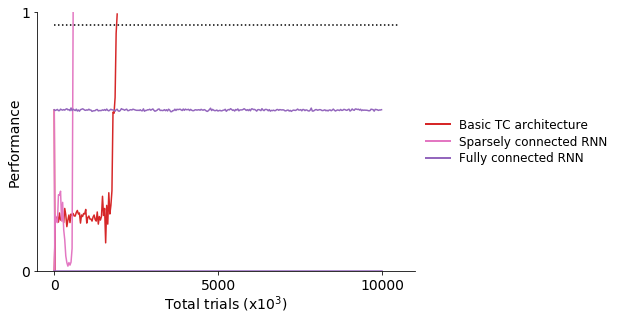

<Figure size 1080x432 with 0 Axes>

In [75]:
importlib.reload(mrnn)

trained_models = ['TC_EI_net_with_TRN_contextdelaydm_MD_task_relu_seed_1',
                  'sparse_control_EI_TC_with_TRN_contextdelaydm_MD_task_relu_seed_1',
                  'fully_connected_EI_RNN_contextdelaydm_MD_task_relu_seed_1'
                 ]

rules = ['contextdelaydm_MD_task_mod1'] # ['contextdelaydm1', 'multidelaydm', 'contextdelaydm2'] ['contextdm1', 'multidelaydm', 'contextdm2'] #model_data['hp']['rules']

labels = ['Basic TC architecture',
          'Sparsely connected RNN',
          'Fully connected RNN'
         ]

mrnn.plt_various_performances(trained_models,models_saving_dir=saving_path,rules=rules,show_legend=True,labels=labels)


In [147]:
importlib.reload(mrnn)
print(model_name)

rule = 'contextdelaydm_MD_task_mod1' #contextdelaydm1 multidelaydm contextdelaydm2

stim1_mod1 = np.array([1])
stim1_mod2 = np.array([0])
stim2_mod1 = np.array([0])
stim2_mod2 = np.array([0])

smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6


In [150]:
n_rnn = 100
n_module = 5
prop_inh = 0.2
prop_TRN = 0.4

n_unit_mod = int(n_rnn/n_module)

subnetworks = [
    {'name': 'PFC',
     'index_range': range(0,n_unit_mod)
     #'pc_projections': 
    },
    {'name': 'Thalamus',
     'index_range': range(4*n_unit_mod+int(prop_TRN*n_unit_mod),5*n_unit_mod)
    },
    {'name': 'TRN',
     'index_range': range(4*n_unit_mod,4*n_unit_mod+int(prop_TRN*n_unit_mod))
    },
    {'name': 'Mod 1',
     'index_range': range(n_unit_mod,2*n_unit_mod)
    },
    {'name': 'Mod 2',
     'index_range': range(2*n_unit_mod,3*n_unit_mod)
    },
    {'name': 'Motor',
     'index_range': range(3*n_unit_mod,4*n_unit_mod)
    }
]

In [151]:
importlib.reload(mrnn)
subnetworks = mrnn.PCAs_on_subnetworks(model_dir, rule, stim1_mod1, stim2_mod1, stim1_mod2, stim2_mod2, subnetworks)


Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 8, 100)
(20, 960)
(960,)

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 8, 100)
(12, 960)
(960,)

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 8, 100)
(8, 960)
(960,)

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 8, 100)
(20, 960)
(960,)

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 8, 100)
(20, 960)
(960,)

Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
(120, 8, 100)
(20, 960)
(960,)


/Users/svasquez91/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


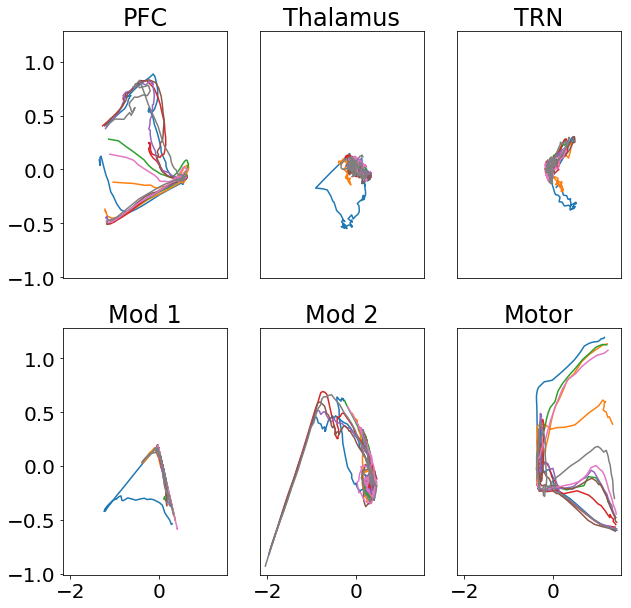

In [152]:
importlib.reload(mrnn)
mrnn.plot_subnetwork_PC_projections(subnetworks)

In [153]:
importlib.reload(mrnn)

params = mrnn.get_sensory_stim_params(stim1_mod1, stim2_mod1, stim1_mod2, stim2_mod2, n_repats=10, single_loc=True)

dict_activations = mrnn.get_all_unit_activations(model_dir, rule, params, average_activations=False, pre_trial_rule='opp_random')



Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt


In [154]:
activations = dict_activations['hidden']#[:, :, range(200)]

[-0.05500000000000001, 1.0499301384261344]


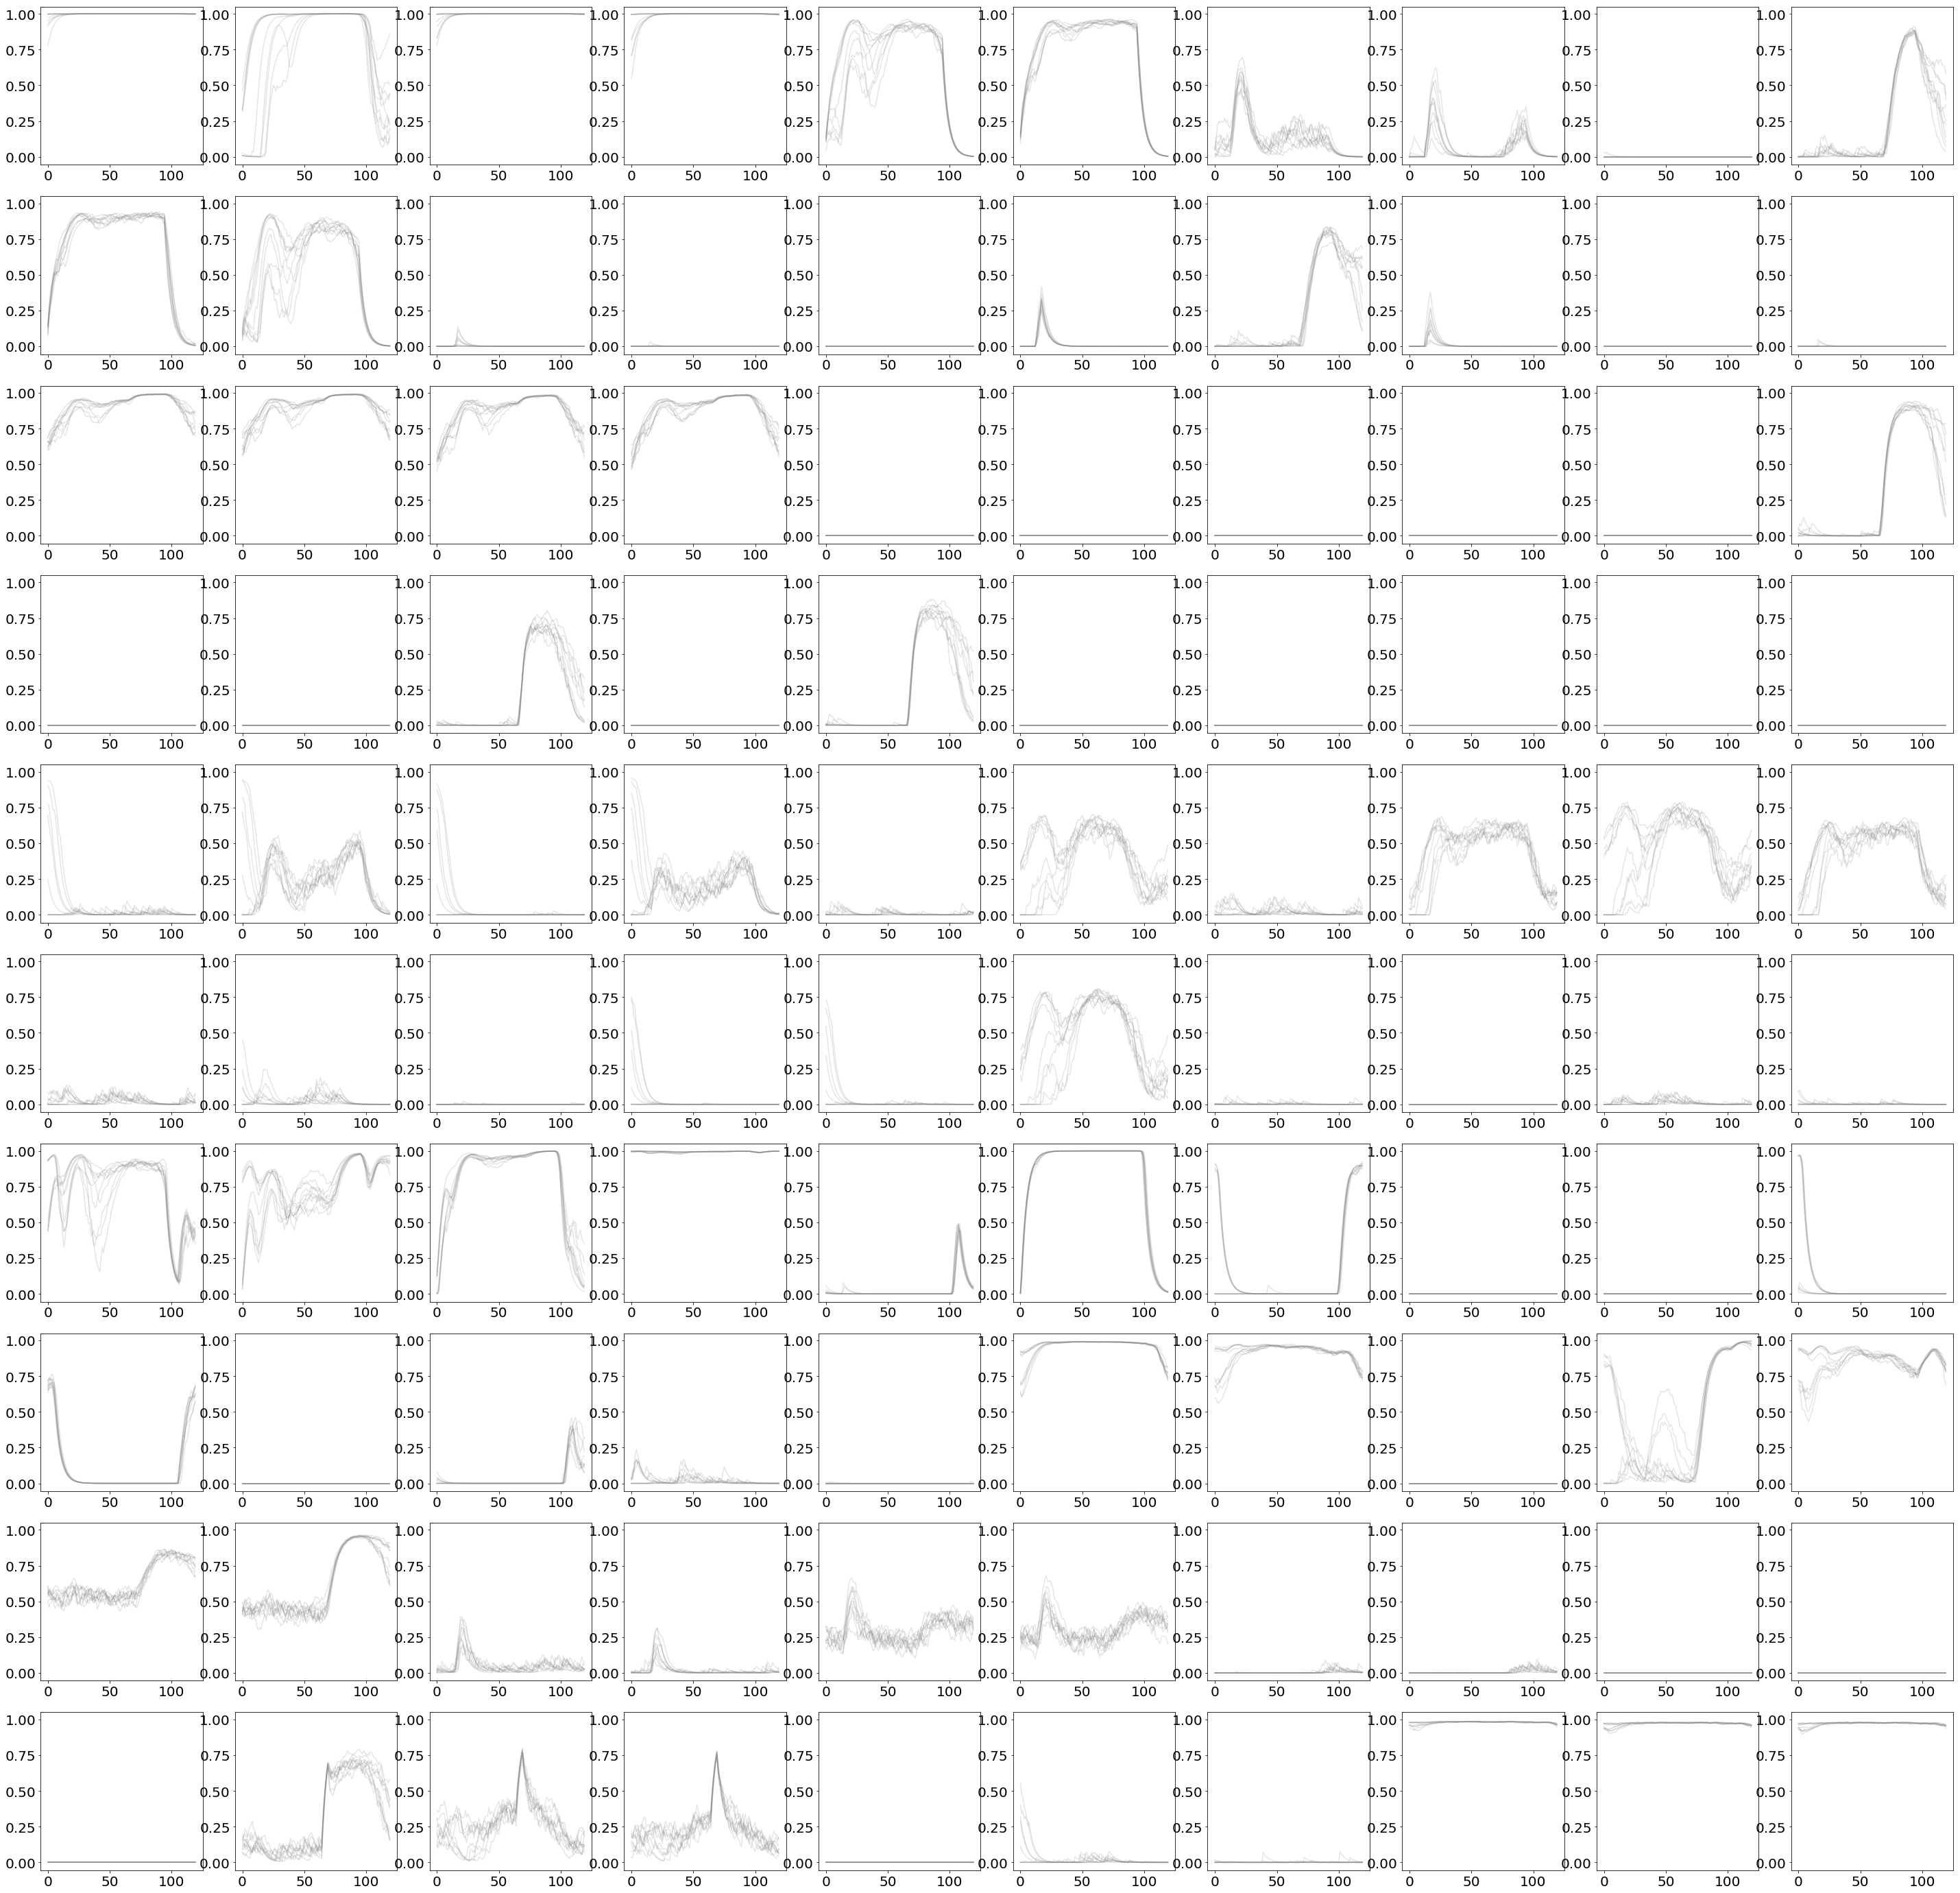

In [155]:
importlib.reload(mrnn)
mrnn.plot_unit_activations(activations)#, global_y_lims=[-0.99, 20.5])

In [159]:
units_to_lesion = range(95,100)

importlib.reload(mrnn)
perf_pre, perf_post = mrnn.perf_pre_post_lesion(model_dir, rule, units_to_lesion)

print('{:0.2f}% performance drop (from {:0.2f}% to {:0.2f}%)'.format(100*(perf_pre-perf_post), 
                                                                     100*perf_pre, 
                                                                     100*perf_post))


Network based on full_EI_CC_TC_with_TRN_v1 weight mask.

Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(107, 100) dtype=float32>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(100,) dtype=float32>
<tf.Variable 'output/weights:0' shape=(100, 3) dtype=float32>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32>


/Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/network.py:478: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if post_node_indexes == 'all':


Model restored from file: /Users/svasquez91/My_scripts_Local/Models_Local/ThalRNN/saved_models/smaller_EI_CC_TC_with_TRN_shared_h_2C_contextdelaydm_MD_task_retanh_seed_0_part6/model.ckpt
-0.10% performance drop (from 99.70% to 99.80%)
